Bhaskar Barman ,
21MS147

In [52]:
import numpy as np
import matplotlib.pyplot as plt

Using Runge kutta Method

In [53]:
def RK4(f,x,y,h,u,l):         
    
    k1 = h*f(x,y,u,l)
    k2 = h*f(x + h/2, y + k1/2,u,l)
    k3 = h*f(x + h/2, y + k2/2,u,l)
    k4 = h*f(x + h, y + k3,u,l)
    
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

In [54]:
def caller(RK4,f,ts,y0,h,u,l):        
    y = y0                                 
    ys = np.zeros((len(ts),2))              
    for i in range(len(ts)):
        x = ts[i]
        ys[i,:] = y         
        y = RK4(f,x,y,h,u,l)
        
    return ys

In [55]:
def f1(t,y,u,l):
    return np.array([y[1],u*(1-(y[0])**2)*y[1]-l*y[0]])

In [56]:
h = 0.0001                
n = int((20-0)/h)
y_initial = np.array([0.5,0.0])
u=5
l=40

ts=np.linspace(0,20,n,endpoint = True)  

In [57]:
y_rk4 = caller(RK4,f1,ts,y_initial,h,u,l)

Plotting the y vs t graph

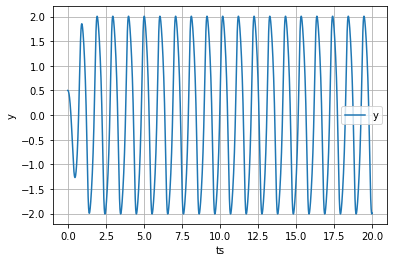

In [58]:
plt.plot(ts, [y_rk4[i][0] for i in range(n)],label = 'y')
plt.xlabel("ts")                    
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

Plotting the y' vs t graph

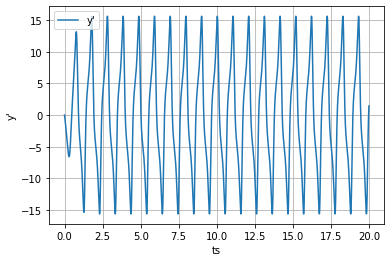

In [59]:
plt.plot(ts, [y_rk4[i][1] for i in range(n)],label = "y'")
plt.xlabel("ts")                    
plt.ylabel("y'")
plt.grid()
plt.legend()
plt.show()

b)Using Dormand Prince adaptive method

In [60]:
a2 = 1/5; b21 = 1/5;
a3 = 3/10; b31 = 3/40; b32 = 9/40;
a4 = 4/5; b41 = 44/45; b42 = -56/15; b43 = 32/9;
a5 = 8/9; b51 = 19372/6561; b52 = -25360/2187; b53 = 64448/6561; b54 =-212/729;
a6 = 1; b61 = 9017/3168; b62 = -355/33; b63 = 46732/5247; b64 = 49/176;
b65 = -5103/18656;
a7 = 1; b71 = 35/384; b72 = 0; b73 = 500/1113; b74 = 125/192;
b75 = -2187/6784; b76 = 11/84;
c1 = 35/384; c2 = 0; c3 = 500/1113; c4 = 125/192; c5=-2187/6784; c6 = 11/84; c7= 0;
c1s = 5179/57600; c2s = 0; c3s = 7571/16695; c4s = 393/640; c5s = -92097/339200;
c6s = 187/2100; c7s = 1/40;

In [61]:
def erk54h(f, x, y, h, k7bh,u,l):

    if sum(k7bh)==0:         
        k1 = h*f(x, y,u,l) 
    else:
        k1 = k7bh*h;

    k2 = h*f(x + a2*h, y + b21*k1,u,l)               
    k3 = h*f(x + a3*h, y + b31*k1 + b32*k2,u,l)
    k4 = h*f(x + a4*h, y + b41*k1 + b42*k2 + b43*k3,u,l)
    k5 = h*f(x + a5*h, y + b51*k1 + b52*k2 + b53*k3 + b54*k4,u,l)
    k6 = h*f(x + a6*h, y + b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5,u,l)

    y5 = y + c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6      

    k7bh = f(x + a7*h, y5,u,l)

    y4 = y + c1s*k1 + c2s*k2 + c3s*k3 + c4s*k4 + c5s*k5 + c6s*k6 + c7s*k7bh*h   

    err = abs(y5 - y4);
    
    return y5, err, k7bh  

def caller54(fn, y_initial, x0, xT, h0, max_iter, abstol, reltol,u,l):
    
    y = y_initial                               
    h = h0
    ys = np.zeros((max_iter,len(y_initial)))
    xs = np.zeros(max_iter)
    xs[0] = x0 
    ys[0,:] = y_initial
    x = x0
    i = 0
    k = 1
    k7bh = np.zeros(np.size(y_initial));
    
    while x<=xT and i+1<max_iter:

        if i == 0:                                            
            tol = abstol + reltol*np.linalg.norm(ys[i,:]);
        else:
            tol = abstol + reltol*np.max([np.linalg.norm(ys[i,:]), np.linalg.norm(ys[i-1,:])])


        y, err, k7bh = erk54h(fn,xs[i],ys[i,:],h, k7bh,u,l)    

        max_err = np.max(err)    

        if max_err == 0.0:
            max_err = tol/100 
            

        if max_err<tol:  
            x += h
            i += 1
            xs[i] = x
            ys[i,:] = y


        h = 0.9*h*((tol/max_err)**0.2)    


    if i>=max_iter:                    
        print(i," Increase max_iter.")
        return None


    return xs[0:i-1], ys[0:i-1,:],i     


In [62]:
max_iter = 10000                                  
abstol = 1.0e-6
reltol = 1.0e-8
y_initial = np.array([0.5,0.0])
x0 = 0.0
xT = 20.0
h0 = 0.0001
x54, y54, step_count = caller54(f1, y_initial, x0, xT, h0, max_iter, abstol, reltol,5,40)

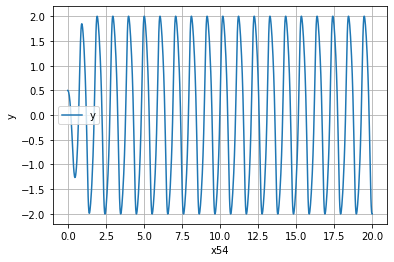

In [63]:
plt.plot(x54, [y54[i][0] for i in range(len(x54))],label = "y")
plt.xlabel("x54")                  
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

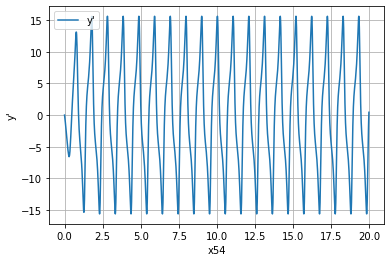

In [64]:
plt.plot(x54, [y54[i][1] for i in range(len(x54))],label = "y'")
plt.xlabel("x54")                   
plt.ylabel("y'")
plt.grid()
plt.legend()
plt.show()

In [65]:
print("The number of steps in Dormand prince method are: ",step_count+1)        



The number of steps in Dormand prince method are:  3184


c) Plotting the phase space trajectory of the oscillator (y′ vs y).


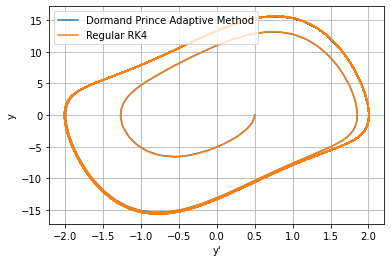

In [68]:
plt.plot([y54[i][0] for i in range(len(x54))],[y54[i][1] for i in range(len(x54))],label='Dormand Prince Adaptive Method')
plt.plot([y_rk4[i][0] for i in range(n)], [y_rk4[i][1] for i in range(n)],label = 'Regular RK4')
plt.legend(loc='upper left')
plt.xlabel("y'")               
plt.ylabel("y")
plt.grid()
plt.show()